cargamos nuestro dataset

In [1]:
%%capture
!pip install datasets transformers
!pip install transformers[torch]

from datasets import load_dataset

data = load_dataset("sasha/dog-food")

visualizamos nuestro dataset

In [2]:
data

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 2100
    })
    test: Dataset({
        features: ['image', 'label'],
        num_rows: 900
    })
})

vemos que cuenta con dos subsets uno de train y otro de test, el primero contiene 2100 imagenes con sus etiquetas , el segundo de test contiene 900 imagenes

In [34]:
imagen= data ["train"][900]
imagen

{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=612x408>,
 'label': 1}

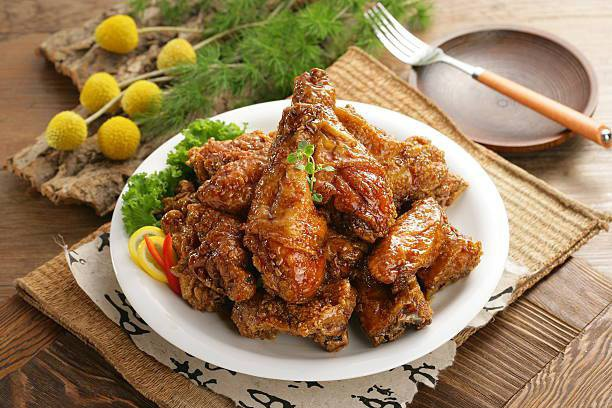

In [35]:
ejemplo= imagen["image"]
ejemplo

chequeamos a ver cuantas etiquetas tenemos y cuales son


In [5]:
label = data["train"].features["label"]
label

ClassLabel(names=['dog', 'food'], id=None)

In [6]:
from datasets import ClassLabel

# Define las etiquetas
class_labels = ClassLabel(names=['dog', 'food'], id=None)

# Supongamos que tienes un identificador numérico
numeric_label = 1

# Convierte el identificador numérico en su nombre de clase correspondiente
class_name = class_labels.names[numeric_label]

# Ahora 'class_name' contiene el nombre de clase correspondiente al identificador numérico
print(class_name)

food


descaragamos el extractor de caracteristicas del hug del mismo modelo para asi poder modelar las imagenees con los mismo parametros con el cual fue entrenado el modelo

In [7]:
from transformers import ViTFeatureExtractor

repo_id = 'google/vit-base-patch16-224-in21k'
feature_extractor = ViTFeatureExtractor.from_pretrained(repo_id)

/usr/local/lib/python3.10/dist-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


vemos de que esta conformado nuestro extractor de caracteristicas

In [8]:
print(feature_extractor)

ViTFeatureExtractor {
  "do_normalize": true,
  "do_rescale": true,
  "do_resize": true,
  "image_mean": [
    0.5,
    0.5,
    0.5
  ],
  "image_processor_type": "ViTFeatureExtractor",
  "image_std": [
    0.5,
    0.5,
    0.5
  ],
  "resample": 2,
  "rescale_factor": 0.00392156862745098,
  "size": {
    "height": 224,
    "width": 224
  }
}



In [9]:
feature_extractor(ejemplo, return_tensors="pt")

{'pixel_values': tensor([[[[-0.7490, -0.7412, -0.7490,  ...,  0.0588,  0.0510,  0.0588],
          [-0.7490, -0.7412, -0.7490,  ...,  0.0667,  0.0588,  0.0745],
          [-0.7490, -0.7412, -0.7412,  ...,  0.0824,  0.0824,  0.0980],
          ...,
          [-0.0667, -0.0510, -0.0667,  ..., -0.6392, -0.6392, -0.6392],
          [-0.0824, -0.0902, -0.1059,  ..., -0.6706, -0.6549, -0.6549],
          [-0.1451, -0.1059, -0.1137,  ..., -0.6706, -0.6627, -0.6471]],

         [[-0.8353, -0.8275, -0.8353,  ...,  0.3098,  0.3098,  0.3176],
          [-0.8353, -0.8275, -0.8353,  ...,  0.3098,  0.3020,  0.3098],
          [-0.8353, -0.8275, -0.8275,  ...,  0.2941,  0.2941,  0.3176],
          ...,
          [ 0.0510,  0.0667,  0.0431,  ..., -0.7176, -0.7255, -0.7176],
          [ 0.0353,  0.0275,  0.0118,  ..., -0.7490, -0.7333, -0.7333],
          [-0.0275,  0.0118,  0.0039,  ..., -0.7490, -0.7412, -0.7255]],

         [[-0.8824, -0.8745, -0.8824,  ...,  0.4431,  0.4431,  0.4510],
          [-0

In [10]:
feature_extractor(ejemplo, return_tensors="pt").keys()

dict_keys(['pixel_values'])

In [11]:
feature_extractor(ejemplo, return_tensors="pt")["pixel_values"].shape

torch.Size([1, 3, 224, 224])

In [12]:
def process_example(imagen):
  inputs = feature_extractor(imagen["image"], return_tensors="pt")
  inputs["labels"] = imagen["label"]
  return inputs

lo probamos con una imagen


In [13]:
process_example(imagen)

{'pixel_values': tensor([[[[-0.7490, -0.7412, -0.7490,  ...,  0.0588,  0.0510,  0.0588],
          [-0.7490, -0.7412, -0.7490,  ...,  0.0667,  0.0588,  0.0745],
          [-0.7490, -0.7412, -0.7412,  ...,  0.0824,  0.0824,  0.0980],
          ...,
          [-0.0667, -0.0510, -0.0667,  ..., -0.6392, -0.6392, -0.6392],
          [-0.0824, -0.0902, -0.1059,  ..., -0.6706, -0.6549, -0.6549],
          [-0.1451, -0.1059, -0.1137,  ..., -0.6706, -0.6627, -0.6471]],

         [[-0.8353, -0.8275, -0.8353,  ...,  0.3098,  0.3098,  0.3176],
          [-0.8353, -0.8275, -0.8353,  ...,  0.3098,  0.3020,  0.3098],
          [-0.8353, -0.8275, -0.8275,  ...,  0.2941,  0.2941,  0.3176],
          ...,
          [ 0.0510,  0.0667,  0.0431,  ..., -0.7176, -0.7255, -0.7176],
          [ 0.0353,  0.0275,  0.0118,  ..., -0.7490, -0.7333, -0.7333],
          [-0.0275,  0.0118,  0.0039,  ..., -0.7490, -0.7412, -0.7255]],

         [[-0.8824, -0.8745, -0.8824,  ...,  0.4431,  0.4431,  0.4510],
          [-0

In [14]:
'''  definimos una funcion para pasar nuestras imagenes por nuestro extractor de caracteristicas'''
def transform(example_batch):
  inputs = feature_extractor([x for x in example_batch["image"]], return_tensors="pt")
  inputs["labels"]= example_batch["label"]

  return inputs


aplicamos la funcion al dataset , La función with_transform es parte de la biblioteca Hugging Face datasets, y se utiliza para aplicar una transformación personalizada a un conjunto de datos sin cargar todo el conjunto de datos de una vez

In [15]:
data_prepared = data.with_transform(transform)

lo probamos a ver si funciona

In [16]:
data_prepared["train"][0:2]

{'pixel_values': tensor([[[[ 0.5608,  0.5922,  0.6078,  ...,  0.6627,  0.6706,  0.6627],
          [ 0.6627,  0.6941,  0.7333,  ...,  0.6863,  0.6784,  0.6627],
          [ 0.7098,  0.7725,  0.7961,  ...,  0.6941,  0.6706,  0.6392],
          ...,
          [ 1.0000,  1.0000,  1.0000,  ...,  1.0000,  1.0000,  1.0000],
          [ 1.0000,  1.0000,  1.0000,  ...,  1.0000,  1.0000,  1.0000],
          [ 1.0000,  1.0000,  1.0000,  ...,  1.0000,  1.0000,  1.0000]],

         [[ 0.6000,  0.6314,  0.6392,  ...,  0.7333,  0.7333,  0.7255],
          [ 0.6941,  0.7255,  0.7647,  ...,  0.7490,  0.7412,  0.7333],
          [ 0.7412,  0.8039,  0.8275,  ...,  0.7490,  0.7255,  0.6941],
          ...,
          [ 1.0000,  1.0000,  1.0000,  ...,  1.0000,  1.0000,  1.0000],
          [ 1.0000,  1.0000,  1.0000,  ...,  1.0000,  1.0000,  1.0000],
          [ 1.0000,  1.0000,  1.0000,  ...,  1.0000,  1.0000,  1.0000]],

         [[ 0.4275,  0.4588,  0.4824,  ...,  0.5294,  0.5451,  0.5529],
          [ 0

In [17]:
data_prepared["train"][0:2].keys()

dict_keys(['pixel_values', 'labels'])

construimos un data collator para unir nustros tensores en 1 , es decir, concatenar todo y tener un solo tensor

In [18]:
import torch

def collate_fn(batch):
    return {
        "pixel_values": torch.stack([x['pixel_values'] for x in batch]),
        "labels": torch.tensor([x["labels"] for x in batch])

    }

In [19]:
collate_fn(data_prepared["train"])

{'pixel_values': tensor([[[[ 0.5608,  0.5922,  0.6078,  ...,  0.6627,  0.6706,  0.6627],
           [ 0.6627,  0.6941,  0.7333,  ...,  0.6863,  0.6784,  0.6627],
           [ 0.7098,  0.7725,  0.7961,  ...,  0.6941,  0.6706,  0.6392],
           ...,
           [ 1.0000,  1.0000,  1.0000,  ...,  1.0000,  1.0000,  1.0000],
           [ 1.0000,  1.0000,  1.0000,  ...,  1.0000,  1.0000,  1.0000],
           [ 1.0000,  1.0000,  1.0000,  ...,  1.0000,  1.0000,  1.0000]],
 
          [[ 0.6000,  0.6314,  0.6392,  ...,  0.7333,  0.7333,  0.7255],
           [ 0.6941,  0.7255,  0.7647,  ...,  0.7490,  0.7412,  0.7333],
           [ 0.7412,  0.8039,  0.8275,  ...,  0.7490,  0.7255,  0.6941],
           ...,
           [ 1.0000,  1.0000,  1.0000,  ...,  1.0000,  1.0000,  1.0000],
           [ 1.0000,  1.0000,  1.0000,  ...,  1.0000,  1.0000,  1.0000],
           [ 1.0000,  1.0000,  1.0000,  ...,  1.0000,  1.0000,  1.0000]],
 
          [[ 0.4275,  0.4588,  0.4824,  ...,  0.5294,  0.5451,  0.5529

cargamos nuestras metricas a utilizar para evaluar

In [20]:
import numpy as np
from datasets import load_metric
import torch.nn as nn

metric = load_metric("accuracy")

def compute_metrics(prediction):
    return metric.compute(predictions=np.argmax(prediction.predictions, axis=1), references=prediction.label_ids)


<ipython-input-20-e430c11a3bfa>:5: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  metric = load_metric("accuracy")


cargamos nueestro modelo con un pequeña configuracion ya que el modelo inicial es para classificar mas clases y nosotros solo necesitamos 2 clases

In [21]:
from transformers import ViTForImageClassification

labels = data["train"].features["label"].names  # Corrige "labels" a "label" si es el nombre correcto
repo_id = 'google/vit-base-patch16-224-in21k'

id2label = {str(i): c for i, c in enumerate(labels)}
label2id = {c: str(i) for i, c in enumerate(labels)}

model = ViTForImageClassification.from_pretrained(
    repo_id,
    ignore_mismatched_sizes=True,
    id2label=id2label,
    label2id=label2id
)

model.classifier = torch.nn.Linear(in_features=model.config.hidden_size, out_features=2)  # Indicamos el número de etiquetas a predecir



Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [22]:
!pip install accelerate -U

In [23]:
pip show accelerate

Name: accelerate
Version: 0.22.0
Summary: Accelerate
Home-page: https://github.com/huggingface/accelerate
Author: The HuggingFace team
Author-email: sylvain@huggingface.co
License: Apache
Location: /usr/local/lib/python3.10/dist-packages
Requires: numpy, packaging, psutil, pyyaml, torch
Required-by: 


armamos nuestros argumentos de entrenamiento

In [24]:
from transformers import TrainingArguments

training_args = TrainingArguments(
    output_dir="./google/vit-base-patch16-224-franciscoflores-classification",  # Ruta del directorio de salida
    evaluation_strategy="steps",
    num_train_epochs=5,# numero de epocas
    learning_rate=2e-4,
    remove_unused_columns=False,
    push_to_hub=True, #subir al hug
    load_best_model_at_end=True, #cargar el mejor modelo
)

ingresamos a nuestro perfil de hugginface

In [ ]:
!huggingface-cli login

In [26]:
from transformers import Trainer

trainer = Trainer(
    model=model,
    args=training_args,#nombre de los argumentos de entrenamiento
    data_collator=collate_fn,#nombre del data collator
    train_dataset=data_prepared["train"],#nombre de la parte de train del los datos preparados
    eval_dataset=data_prepared["test"],# nombre de los datos de validacion de los datos preparados
    tokenizer=feature_extractor# nombre del feature extractor
)

In [27]:
train_results = trainer.train()
trainer.save_model()
trainer.log_metrics("train", train_results.metrics) #decimos que nos muestre las metricas de train
trainer.save_metrics("train", train_results.metrics)

Step,Training Loss,Validation Loss
500,0.045000,0.082772
1000,0.008100,0.007352


***** train metrics *****
  epoch                    =         5.0
  total_flos               = 757785412GF
  train_loss               =      0.0203
  train_runtime            =  0:09:39.09
  train_samples_per_second =      18.132
  train_steps_per_second   =       2.271


ahora evaluamos nuestro modelo

In [28]:
#hacemos una prediccion
predictions = trainer.predict(data_prepared["test"])

# Imprime las predicciones
print(predictions)

PredictionOutput(predictions=array([[ 3.7211242, -3.7752826],
       [ 3.7302434, -3.7825987],
       [ 3.5228763, -3.609089 ],
       ...,
       [-3.7711227,  3.8883808],
       [-3.7837508,  3.861176 ],
       [-3.6851108,  3.7867217]], dtype=float32), label_ids=array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
    

In [30]:
metrics = trainer.evaluate(data_prepared["test"])# lo hacemos ahora con el subset de validacion
trainer.log_metrics("eval", metrics)
trainer.save_metrics("eval", metrics)

***** eval metrics *****
  epoch                   =        5.0
  eval_loss               =     0.0074
  eval_runtime            = 0:00:21.94
  eval_samples_per_second =     41.008
  eval_steps_per_second   =      5.149


In [29]:
from sklearn.metrics import accuracy_score


predicted_labels = np.argmax(predictions.predictions, axis=1)
true_labels = predictions.label_ids
accuracy = accuracy_score(true_labels, predicted_labels)

print(f"Accuracy: {accuracy}")








Accuracy: 0.9966666666666667


vemos que nuestro modelo obtuvo un 99% de aciertos y una perdida muy baja

In [31]:
kwargs = {
    "finetuned_from": model.config._name_or_path,#indica el nombre del modelo
    "tasks": "image-classification", # la tarea que hace e modelo
    "dataset": "julien-c/hotdog-not-hotdog",# nombre del dataset que utilizamos para entrenar
    "tags": ["image-classification"]# esto es para que la api se adecue a la tarea y
#lo puedan probar en linea sin teener q descargar
}

trainer.push_to_hub(commit_message="modelo de clasificacion listo! 🤗", **kwargs)

'https://huggingface.co/franciscoafy/vit-base-patch16-224-franciscoflores-classification/tree/main/'

guardamos nuestro modelo ya entrenado

In [ ]:
import torch


# Guarda el modelo en formato PKL
torch.save(trainer.model, 'modelo_entrenado.pkl')